# Who's That Pokémon? - CSCI 450 Computer Vision and Machine Learning Project

## Introduction

This project aims to classify Pokémon images using traditional computer vision and machine learning techniques (not neural networks, as per project requirements). We will explore how well different sklearn computer vision methods can match Pokémon and compare the performance of these methods.

### Dataset

The dataset contains ~40 images per 1,000 Pokémon species, with each image resized to 128x128 pixels and stored as a PNG file. The data is structured in subdirectories for each class.

- Total images: 26,539
- Total classes: 1,000
- Size: ~407MB

### Project Goals

1. Evaluate how well sklearn computer vision methods can match Pokémon
2. Compare different methods in terms of accuracy
3. Analyze how generational differences affect these methods

In [9]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## 1. Data Exploration

Let's first explore the structure of our dataset and visualize some examples.

In [2]:
# Load the metadata
metadata_path = '../../data/kaggle_data/metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display basic information about the metadata
print(f"Metadata shape: {metadata.shape}")
print("\nFirst few rows of metadata:")
metadata.head()

Metadata shape: (26539, 8)

First few rows of metadata:


,label,image_path,hp,attack,defense,special-attack,special-defense,speed
0,abomasnow,dataset/abomasnow/abomasnow_8.png,90,92,75,92,85,60
1,abomasnow,dataset/abomasnow/abomasnow_18.png,90,92,75,92,85,60
2,abomasnow,dataset/abomasnow/abomasnow_11.png,90,92,75,92,85,60
3,abomasnow,dataset/abomasnow/abomasnow_16.png,90,92,75,92,85,60
4,abomasnow,dataset/abomasnow/abomasnow_9.png,90,92,75,92,85,60


Number of unique Pokémon: 1000

Average images per Pokémon: 26.54
Min images for a Pokémon: 6
Max images for a Pokémon: 40


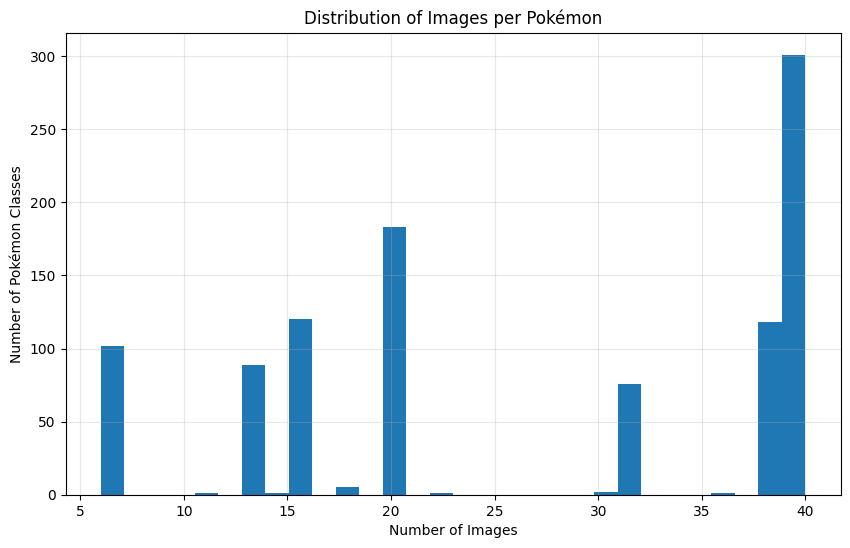

In [3]:
# Count the number of unique Pokémon (classes)
unique_pokemon = metadata['label'].unique()
print(f"Number of unique Pokémon: {len(unique_pokemon)}")

# Count images per Pokémon and display distribution
pokemon_counts = metadata['label'].value_counts()
print(f"\nAverage images per Pokémon: {pokemon_counts.mean():.2f}")
print(f"Min images for a Pokémon: {pokemon_counts.min()}")
print(f"Max images for a Pokémon: {pokemon_counts.max()}")

# Plot distribution of images per Pokémon
plt.figure(figsize=(10, 6))
plt.hist(pokemon_counts, bins=30)
plt.title('Distribution of Images per Pokémon')
plt.xlabel('Number of Images')
plt.ylabel('Number of Pokémon Classes')
plt.grid(alpha=0.3)
plt.show()


Examples of abomasnow:


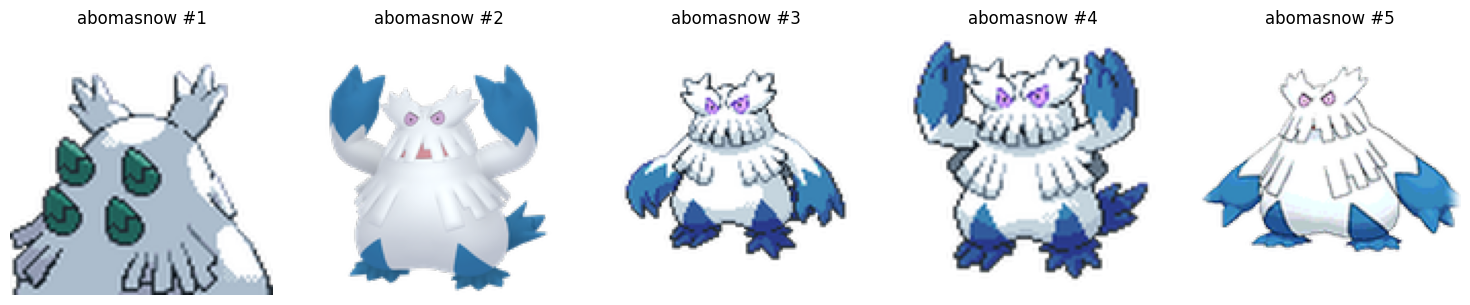


Examples of abra:


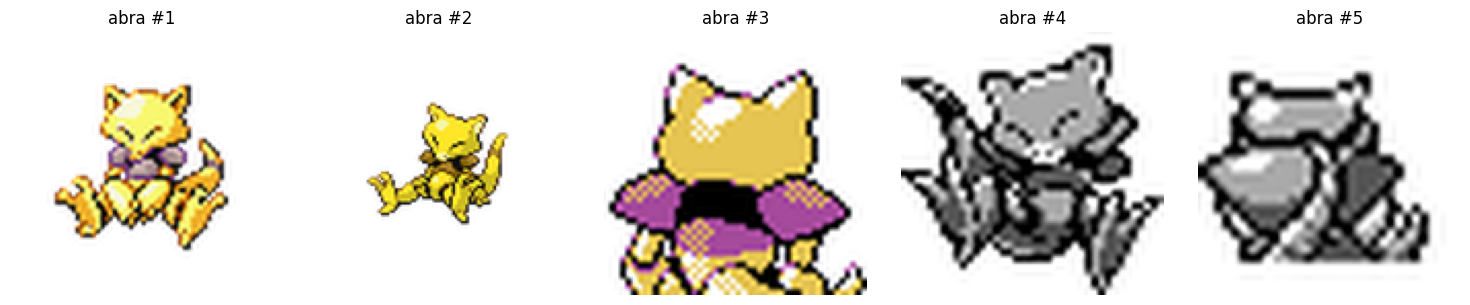


Examples of absol:


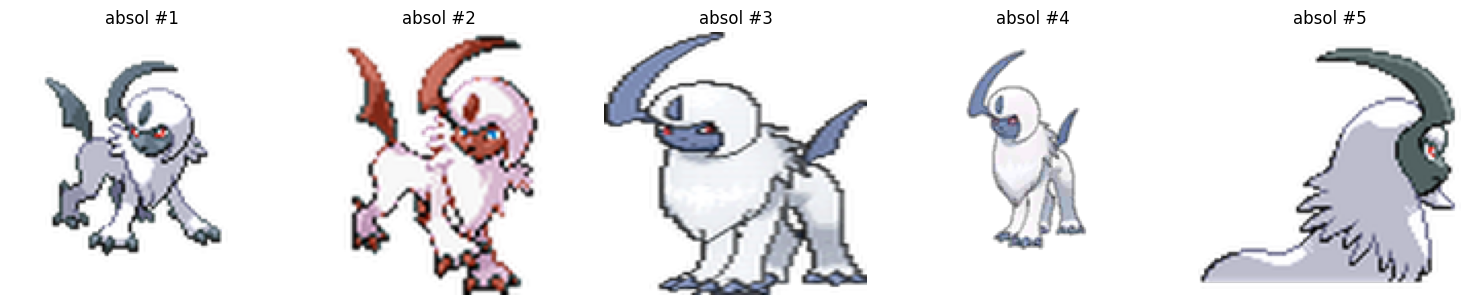

In [8]:
# Function to load and display some example images
def display_pokemon_examples(pokemon_name, num_examples=5):
    # Get paths for this Pokémon
    pokemon_data = metadata[metadata['label'] == pokemon_name]
    sample_paths = pokemon_data['image_path'].sample(min(num_examples, len(pokemon_data))).values
    
    # Set up the plot
    fig, axes = plt.subplots(1, len(sample_paths), figsize=(15, 3))
    if len(sample_paths) == 1:
        axes = [axes]
    
    # Load and display each image
    for i, path in enumerate(sample_paths):
        img_path = os.path.join('../../data/kaggle_data', path)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].set_title(f"{pokemon_name} #{i+1}")
            axes[i].axis('off')
        else:
            print(f"Image not found: {img_path}")
    
    plt.tight_layout()
    plt.show()

# Display examples of a few different Pokémon
pokemon_examples = unique_pokemon[:3]  # First 3 Pokémon in the dataset
for pokemon in pokemon_examples:
    print(f"\nExamples of {pokemon}:")
    display_pokemon_examples(pokemon)

## 2. Feature Extraction

Let's implement and test different feature extraction methods for the Pokémon images. We'll explore:

1. Color histograms
2. HOG (Histogram of Oriented Gradients) features
3. Image hashing
4. SIFT (Scale-Invariant Feature Transform) descriptors

First, let's implement a color histogram extraction function.

In [7]:
# Function to extract color histograms from an image
def extract_color_histogram(image_path, bins=32):
    try:
        # Load the image
        img = Image.open(image_path)
        
        # Convert to RGB if needed
        if img.mode != 'RGB':
            img = img.convert('RGB')
            
        # Convert to numpy array
        img_array = np.array(img)
        
        # Extract histograms for each channel
        hist_r, _ = np.histogram(img_array[:,:,0].flatten(), bins=bins, range=(0, 256))
        hist_g, _ = np.histogram(img_array[:,:,1].flatten(), bins=bins, range=(0, 256))
        hist_b, _ = np.histogram(img_array[:,:,2].flatten(), bins=bins, range=(0, 256))
        
        # Concatenate the histograms
        hist_features = np.concatenate([hist_r, hist_g, hist_b])
        
        # Normalize the histogram
        hist_features = hist_features.astype('float')
        hist_features /= (hist_features.sum() + 1e-7)  # Add small value to avoid division by zero
        
        return hist_features
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

## 3. Next Steps

In the next sections, we'll implement:

1. Complete feature extraction for all images using different methods
2. Train various machine learning classifiers (e.g., SVM, Random Forest, KNN) on the extracted features
3. Evaluate and compare the performance of different classifiers
4. Analyze how well each method works for different generations of Pokémon
5. Visualize and interpret the results